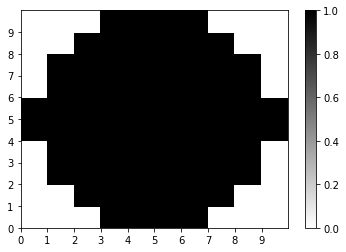

In [168]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage import rotate

# Use 10x10 square grid and set predetermined elements to zero create MaNGA hexagon
x = np.arange(10)
y = x
z = np.ones([10, 10])

# Elements of z to set to 0
hex_zeros = np.array([[0, 0], [0, 1], [0, 2], [3, 0], [6, 0], [0, 7], [0, 8], [0, 9], [1, 0], [1, 1], [1, 8], 
                      [1, 9], [2, 0], [2, 9], [7, 0], [7, 9], [8, 0], [8, 1], [8, 8], [8, 9], [9, 0], [9, 1],
                      [9, 2], [6, 9], [3, 9], [9, 7], [9, 8], [9, 9]])

for i in range(np.shape(hex_zeros)[0]):
    z[hex_zeros[i, 0], hex_zeros[i, 1]] = 0

# Plot hexagon
fig, ax = plt.subplots(1)
sim_pcolormesh = ax.pcolormesh(x, y, z, cmap=cm.binary, shading="auto")
fig.colorbar(sim_pcolormesh, ax=ax)

# Set tick values to line up with start of spaxel
ax.set_xticks(ticks=x-0.5)
ax.set_xticklabels(list(x))
ax.set_yticks(ticks=y-0.5)
ax.set_yticklabels(list(y));

### Create functions/arrays for each kinematic class of galaxies

In [238]:
# Manually create rotation-dominated galaxy array
rot_sup_manual = np.array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
                   [0, 0, 1, 1, 1, 1, 1, 1, 0, 0], 
                   [0, 0.66, 0.66, 1, 1, 1, 1, 0.66, 0.66, 0], 
                   [0, 0.33, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.33, 0], 
                   [0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33], 
                   [-0.33, -0.33, -0.33, -0.33, -0.33, -0.33, -0.33, -0.33, -0.33, -0.33], 
                   [0, -0.33, -0.66, -0.66, -0.66, -0.66, -0.66, -0.66, -0.33, 0], 
                   [0, -0.66, -0.66, -1, -1, -1, -1, -0.66, -0.66, 0], 
                   [0, 0, -1, -1, -1, -1, -1, -1, 0, 0], 
                   [0, 0, 0, -1, -1, -1, -1, 0, 0, 0]])

x = np.arange(np.shape(rot_sup)[0])
y = x

def rotation_dominated():
    # Create rotation-dominated galaxy array using random numbers
    rot_sup_rand = np.zeros([10, 10])

    # For a given row of the galaxy, draw from a selected random distribution
    for i in range(10):
        for j in range(10):
            if 0 <= i <= 1:
                rot_sup_rand[i, j] = np.random.uniform(1, 0.66)
            if 2 <= i <= 3:
                rot_sup_rand[i, j] = np.random.uniform(0.66, 0.33)
            if 4 <= i <= 5:
                rot_sup_rand[i, j] = np.random.uniform(0.33, -0.33)
            if 6 <= i <= 7:
                rot_sup_rand[i, j] = np.random.uniform(-0.33, -0.66)
            if 8 <= i <= 9:
                rot_sup_rand[i, j] = np.random.uniform(-0.66, -1)

    # Add in hexagon code:
    for i in range(np.shape(hex_zeros)[0]):
        rot_sup_rand[hex_zeros[i, 0], hex_zeros[i, 1]] = 0
    
    return rot_sup_rand

def dispersion_dominated():
    # Create dispersion-dominated galaxy array
    dis_sup = np.zeros([10, 10])

    # For a given section of the galaxy, drawn from a selected random distribution
    for i in range(10):
        for j in range(10):
            if 3 <= i <= 6 and 3 <= j <= 6:
                dis_sup[i, j] = np.random.uniform(-0.25, 0.25)
            else:
                dis_sup[i, j] = np.random.uniform(-1, 1)

    # Add in hexagon code:
    for i in range(np.shape(hex_zeros)[0]):
        dis_sup[hex_zeros[i, 0], hex_zeros[i, 1]] = 0
        
    return dis_sup

def residual(sv, gv):
    
    """
    INPUT
    sv: stellar velocity map
    gv: gas velocity map
    
    OUTPUT
    res_vals: residual velocity value at each point on map
    sum_res_vals: total residual velocity
    """
    res_vals = np.abs(sv - gv)
    sum_res_vals = np.sum(res_vals)
    
    return res_vals, sum_res_vals

### Create residual velocity for rotation-dominated stellar velocity and dispersion-dominated gas velocity

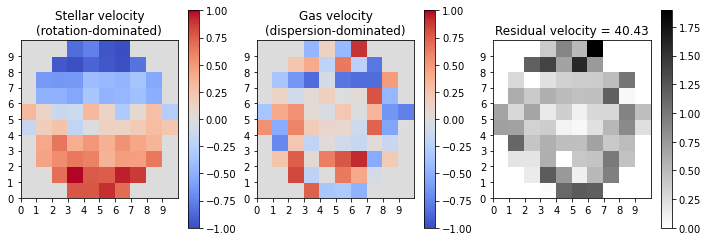

In [242]:
# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create variables for each random generation
sv = rotation_dominated()
gv = dispersion_dominated()
res = residual(sv, gv)

# Create plotting axes
x = np.arange(np.shape(sv)[0])
y = x

# Plot rotation-dominated stellar velocity
sv_pcolormesh = ax[0].pcolormesh(x, y, sv, cmap=cm.coolwarm, vmin=-1, vmax=1, shading="auto")
fig.colorbar(sv_pcolormesh, ax=ax[0])
ax[0].set_aspect('equal')
ax[0].set_title("Stellar velocity\n(rotation-dominated)")

ax[0].set_xticks(ticks=x-0.5)
ax[0].set_xticklabels(list(x))
ax[0].set_yticks(ticks=y-0.5)
ax[0].set_yticklabels(list(y));

# Plot dispersion-dominated-galaxy
gv_pcolormesh = ax[1].pcolormesh(x, y, gv, cmap=cm.coolwarm, vmin=-1, vmax=1, shading="auto")
fig.colorbar(gv_pcolormesh, ax=ax[1])
ax[1].set_aspect('equal')
ax[1].set_title("Gas velocity\n(dispersion-dominated)")

ax[1].set_xticks(ticks=x-0.5)
ax[1].set_xticklabels(list(x))
ax[1].set_yticks(ticks=y-0.5)
ax[1].set_yticklabels(list(y));

# Plot residual velocity
res_pcolormesh = ax[2].pcolormesh(x, y, res[0], cmap=cm.binary, shading="auto")
fig.colorbar(res_pcolormesh, ax=ax[2])
ax[2].set_aspect('equal')
ax[2].set_title("Residual velocity = " + "{:.2f}".format(res[1]))

ax[2].set_xticks(ticks=x-0.5)
ax[2].set_xticklabels(list(x))
ax[2].set_yticks(ticks=y-0.5)
ax[2].set_yticklabels(list(y));

### Use scipy.ndimage.rotate to change rotation angle of galaxy

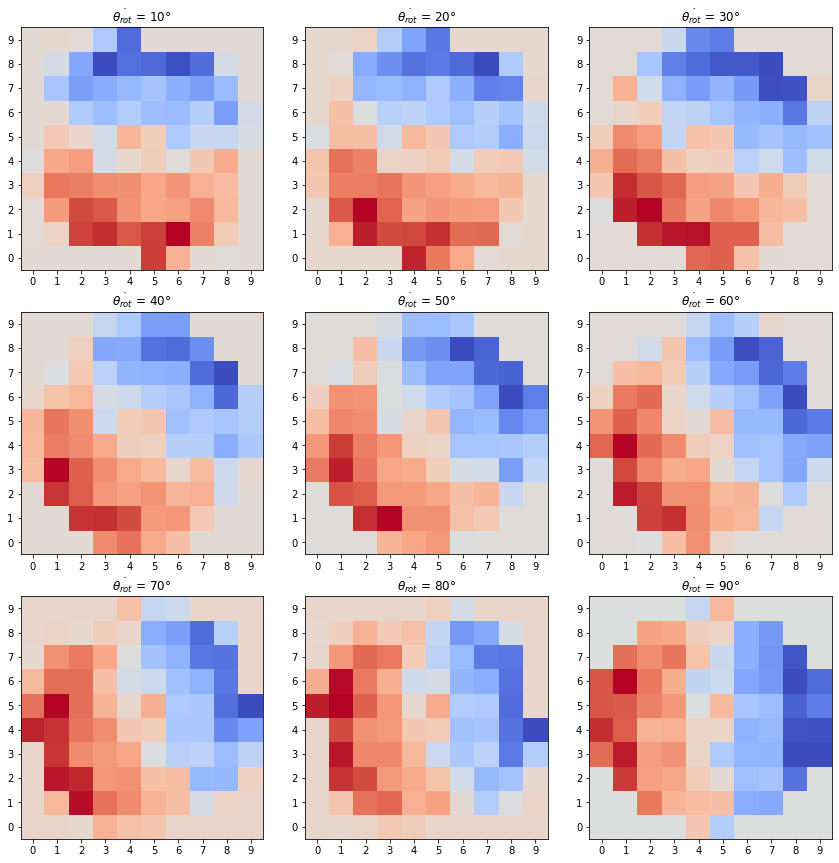

In [247]:
# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
plt.tight_layout()

for i in range(9):
    # Use scipy.ndimage.rotate by 10 degrees each time
    sv_rot = rotate(input=sv, angle=10*(i+1), reshape=False)  # Don't change shape of array

    # Determine coloumn and row of each subplot
    col = int(np.floor(i/3))
    row = np.remainder(i, 3)
    
    # Plot result
    ax[col, row].pcolormesh(x, y, sv_rot, cmap=cm.coolwarm, shading="auto")
    ax[col, row].set_aspect('equal')
    ax[col, row].set_title(r"$\dot{\theta_{rot}}$ = " + str(10*(i+1)) + "$\degree$")
    ax[col, row].set_xticks(ticks=x)
    ax[col, row].set_xticklabels(list(x))
    ax[col, row].set_yticks(ticks=y)
    ax[col, row].set_yticklabels(list(y));
    
plt.savefig("rotated_galaxy.jpg")

### Investigate residual velocity for different offset angles of a rotation-dominated stellar velocity against a rotation-dominated/dispersion-dominated gas velocity

Generate data and initial residuals

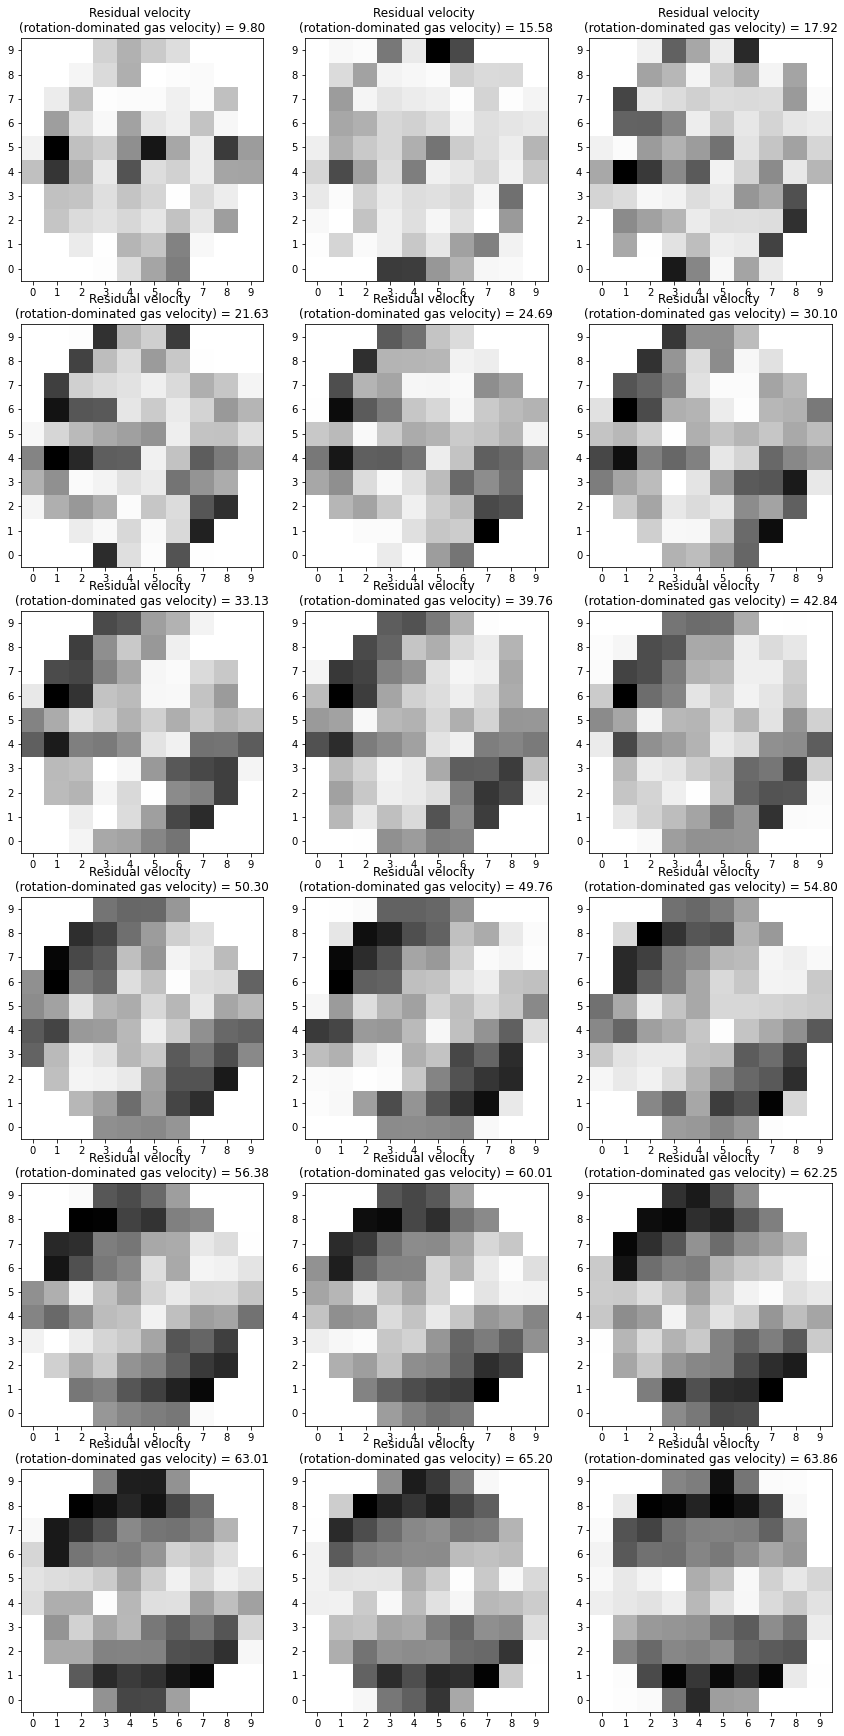

In [314]:
# Create initial velocity maps
sv = rotation_dominated()
gv_rot = rotation_dominated()  # Rotation-dominated gas velocity
gv_dis = dispersion_dominated()  # Dispersion dominated gas velocity

# Array to store every residual velocity value between 0 and 180 degrees
rv_rot_rot_array = np.zeros(18)
rv_rot_dis_array = np.zeros(18)
angle_array = np.zeros(18)

# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12, 24))
plt.tight_layout()

# Rotate between 0 and 180
for i in range(18):
    # Use scipy.ndimage.rotate by 10 degrees each time
    sv_rot = rotate(input=sv, angle=10*i, reshape=False)  # Don't change shape of array
    
    # Calculate residuals for both rotation-dominated and dispersion-dominated gas velocities
    rv_rot_rot = residual(sv_rot, gv_rot)
    rv_rot_dis = residual(sv_rot, gv_dis)
    
    # Add summed residual and current angle to array
    rv_rot_rot_array[i] = rv_rot_rot[1]
    rv_rot_dis_array[i] = rv_rot_dis[1]
    angle_array[i] = 10*i
    
    # Determine coloumn and row of each subplot
    col = int(np.floor(i/3))
    row = np.remainder(i, 3)
    
    # Plot residual image
    ax[col, row].pcolormesh(x, y, rv_rot_rot[0], cmap=cm.binary, shading="auto")
    ax[col, row].set_aspect('equal')
    ax[col, row].set_title("Residual velocity \n(rotation-dominated gas velocity) = " + "{:.2f}".format(rv_rot_rot[1]))
    ax[col, row].set_xticks(ticks=x)
    ax[col, row].set_xticklabels(list(x))
    ax[col, row].set_yticks(ticks=y)
    ax[col, row].set_yticklabels(list(y));

Plot residual veloctity for each method against rotation angle

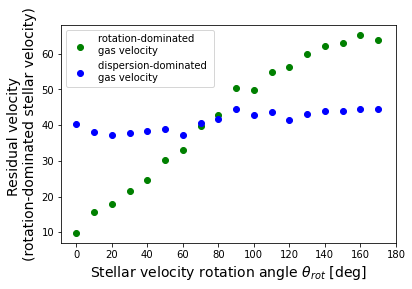

In [324]:
plt.scatter(angle_array, rv_rot_rot_array, color="green", label="rotation-dominated \ngas velocity")
plt.scatter(angle_array, rv_rot_dis_array, color="blue", label="dispersion-dominated \ngas velocity")

plt.xlabel(r"Stellar velocity rotation angle $\theta_{rot}$ [deg]", fontsize=14)
plt.ylabel("Residual velocity \n(rotation-dominated stellar velocity)", fontsize=14)
plt.xticks(np.arange(0, 200, 20));
plt.legend()
plt.savefig("RV_for_different_gv_kinematics_vs_rotation_angle_with_rotation_dominated_sv.jpg")

### Investigate residual velocity for different offset angles of a dispersion-dominated stellar velocity against a rotation-dominated/dispersion-dominated gas velocity

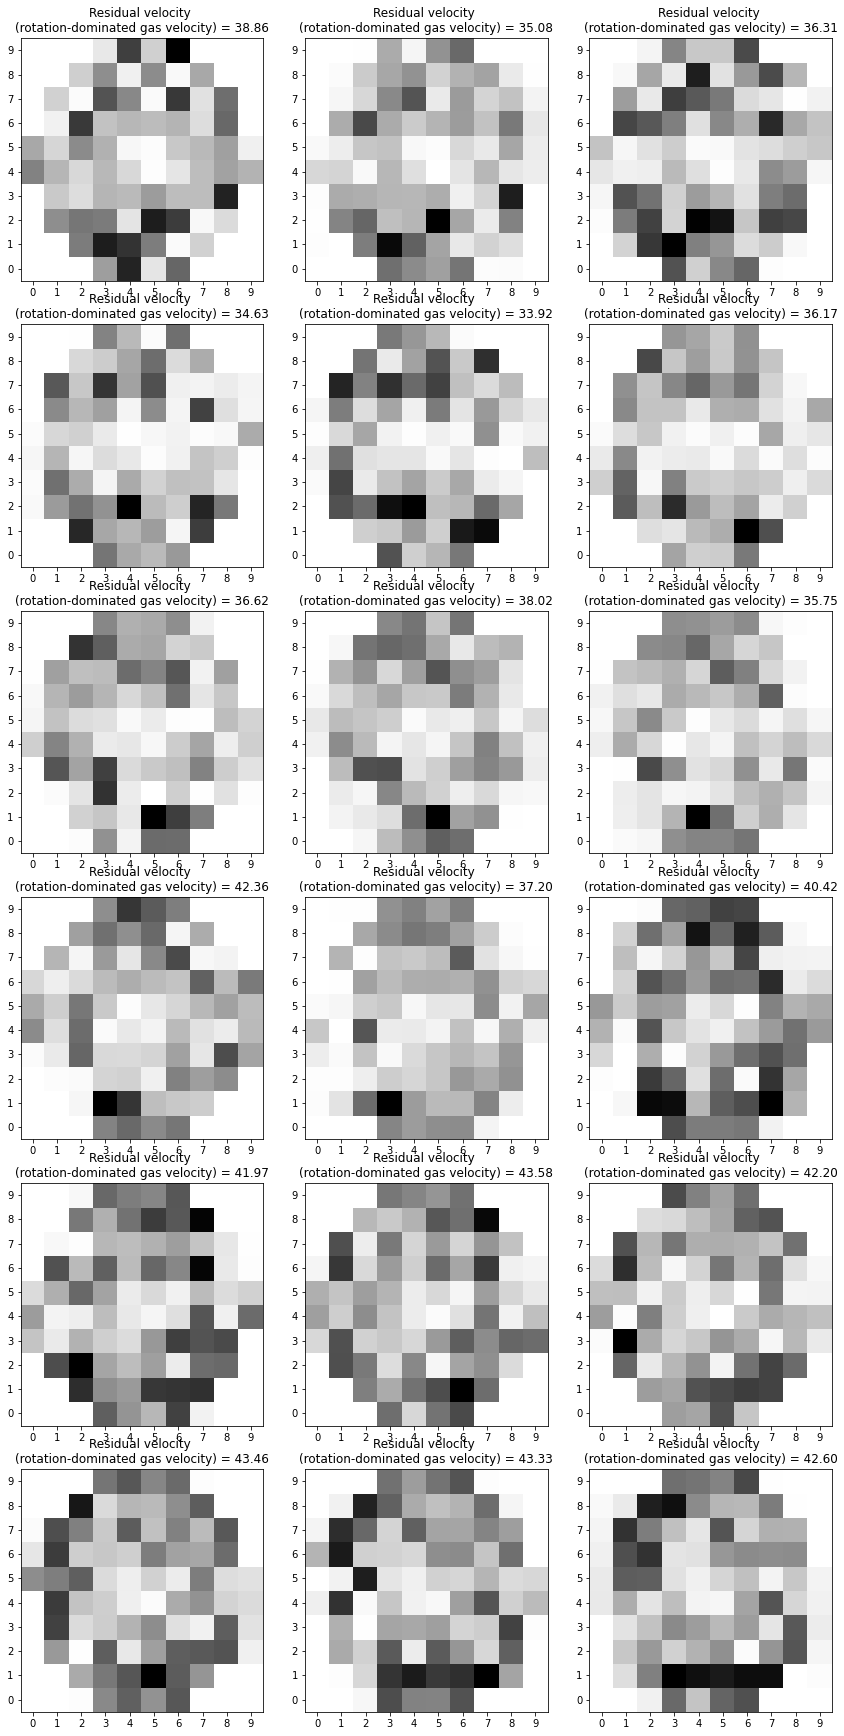

In [345]:
# Create initial velocity maps
sv = dispersion_dominated()
gv_rot = rotation_dominated()  # Rotation-dominated gas velocity
gv_dis = dispersion_dominated()  # Dispersion dominated gas velocity

# Array to store every residual velocity value between 0 and 180 degrees
rv_dis_rot_array = np.zeros(18)
rv_dis_dis_array = np.zeros(18)
angle_array = np.zeros(18)

# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12, 24))
plt.tight_layout()

# Rotate between 0 and 180
for i in range(18):
    # Use scipy.ndimage.rotate by 10 degrees each time
    sv_rot = rotate(input=sv, angle=10*i, reshape=False)  # Don't change shape of array
    
    # Calculate residuals for both rotation-dominated and dispersion-dominated gas velocities
    rv_dis_rot = residual(sv_rot, gv_rot)
    rv_dis_dis = residual(sv_rot, gv_dis)
    
    # Add summed residual and current angle to array
    rv_dis_rot_array[i] = rv_dis_rot[1]
    rv_dis_dis_array[i] = rv_dis_dis[1]
    angle_array[i] = 10*i
    
    # Determine coloumn and row of each subplot
    col = int(np.floor(i/3))
    row = np.remainder(i, 3)
    
    # Plot residual image
    ax[col, row].pcolormesh(x, y, rv_dis_rot[0], cmap=cm.binary, shading="auto")
    ax[col, row].set_aspect('equal')
    ax[col, row].set_title("Residual velocity \n(rotation-dominated gas velocity) = " + "{:.2f}".format(rv_dis_rot[1]))
    ax[col, row].set_xticks(ticks=x)
    ax[col, row].set_xticklabels(list(x))
    ax[col, row].set_yticks(ticks=y)
    ax[col, row].set_yticklabels(list(y));

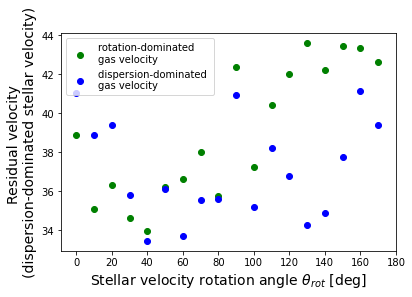

In [346]:
plt.scatter(angle_array, rv_dis_rot_array, color="green", label="rotation-dominated \ngas velocity")
plt.scatter(angle_array, rv_dis_dis_array, color="blue", label="dispersion-dominated \ngas velocity")

plt.xlabel(r"Stellar velocity rotation angle $\theta_{rot}$ [deg]", fontsize=14)
plt.ylabel("Residual velocity \n(dispersion-dominated stellar velocity)", fontsize=14)
plt.xticks(np.arange(0, 200, 20));
plt.legend()
plt.savefig("RV_for_different_gv_kinematics_vs_rotation_angle_with_dispersion_dominated_sv.jpg")

Plot two previous plots together

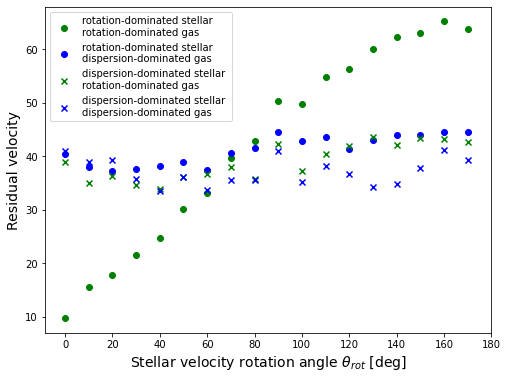

In [356]:
# Rotation-dominated stellar velocity
plt.figure(1, figsize=(8, 6))
plt.scatter(angle_array, rv_rot_rot_array, color="green", label="rotation-dominated stellar \nrotation-dominated gas")
plt.scatter(angle_array, rv_rot_dis_array, color="blue", label="rotation-dominated stellar \ndispersion-dominated gas")

# Dispersion-dominated stellar velocity
plt.scatter(angle_array, rv_dis_rot_array, color="green", marker="x", label="dispersion-dominated stellar \nrotation-dominated gas")
plt.scatter(angle_array, rv_dis_dis_array, color="blue", marker="x", label="dispersion-dominated stellar \ndispersion-dominated gas")

plt.xlabel(r"Stellar velocity rotation angle $\theta_{rot}$ [deg]", fontsize=14)
plt.ylabel("Residual velocity", fontsize=14)
plt.legend()
plt.xticks(np.arange(0, 200, 20));
plt.savefig("RV_vs_rotation_angle_with_both_sv_and_gv_kinematic_classes.jpg")